### Senanur Ağaç - 200102002043

### LAB04

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.fft import fft
from scipy.fft import fftshift
from scipy.fft import ifft2

In [20]:
def mypgmread(filename):
    with open(filename, 'rb') as f:
        header = []
        # PGM dosyasının başlık bilgileri okundu
        while True:
            line = f.readline().decode('ascii').strip()
            if not line or line.startswith('#'):
                continue
            header.append(line)
            if len(header) == 3:
                break

        if len(header) < 3:
            print("Geçersiz PGM dosya formatı.")
            return None

        # Genişlik, yükseklik ve maksimum değer başlık bilgilerinden alındı
        width, height = map(int, header[1].split())
        maxval = int(header[2])

        # Veriyi okundu
        pixel_values = np.fromfile(f, dtype=np.uint8, count=width * height)

        # Veriyi boyutlarına uygun şekilde yeniden şekillendildi
        pixel_values = pixel_values.reshape((height, width))

        return pixel_values, width, height, maxval


### Fig0343

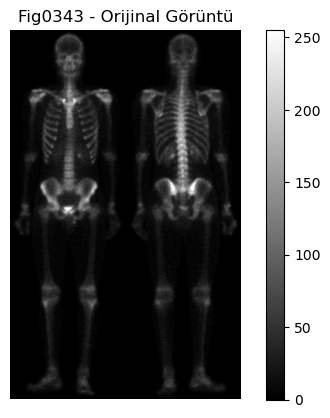

In [21]:
Fig0343, width, height, maxval = mypgmread('Fig0343.pgm')
plt.imshow(Fig0343, cmap='gray')
plt.colorbar()
plt.title('Fig0343 - Orijinal Görüntü')
plt.axis('off')
plt.show()

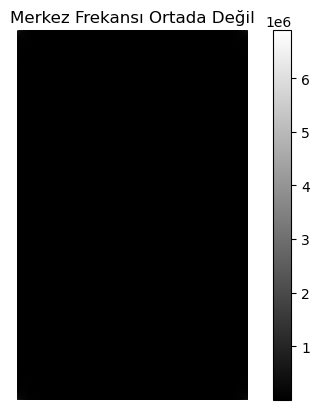

In [22]:
def my_2d_fft(input_array):
    # Her satır için 1D FFT 
    fft_result = np.array([fft(row) for row in input_array])

    # Her sütun için 1D FFT 
    fft_result = np.array([fft(fft_result[:, i]) for i in range(fft_result.shape[1])]).T
    
    
    return fft_result

Fig0343bspect = my_2d_fft(Fig0343)
plt.imshow((np.abs(Fig0343bspect)), cmap='gray')
plt.colorbar()
plt.title('Merkez Frekansı Ortada Değil')
plt.axis('off')

plt.show()

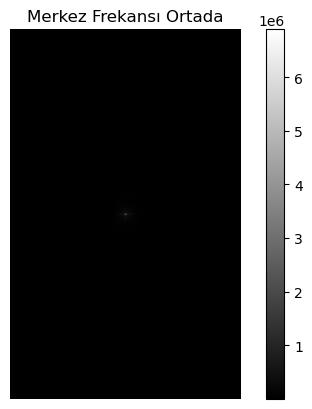

In [23]:
Fig0343shift = my_2d_fft(Fig0343)
centered_spectrum = fftshift(Fig0343bspect)
plt.imshow((np.abs(centered_spectrum)), cmap='gray')
plt.colorbar()
plt.title('Merkez Frekansı Ortada')
plt.axis('off')

plt.show()


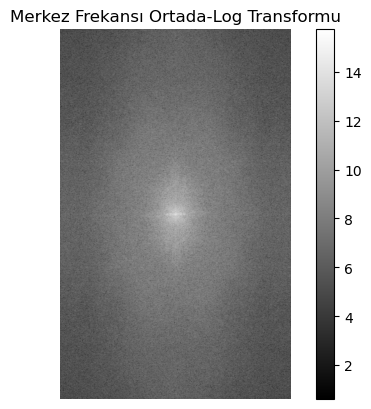

In [24]:
plt.imshow(np.log1p(np.abs(centered_spectrum)), cmap='gray')
plt.colorbar()
plt.title('Merkez Frekansı Ortada-Log Transformu')
plt.axis('off')

plt.show()


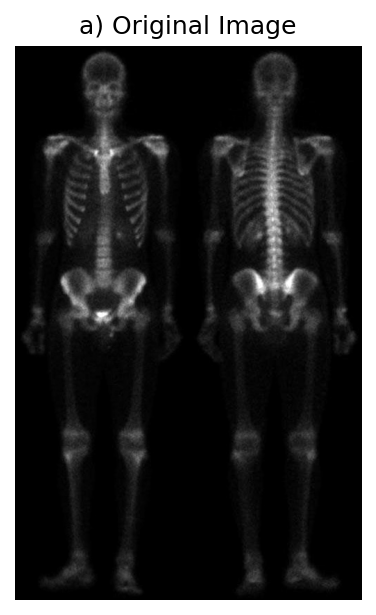

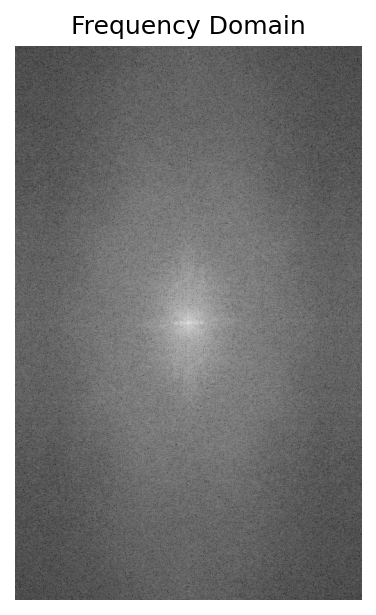

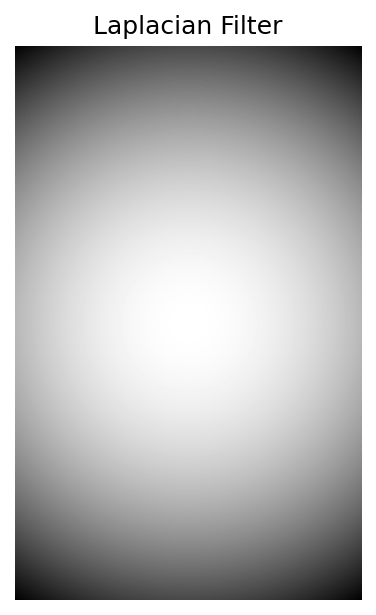

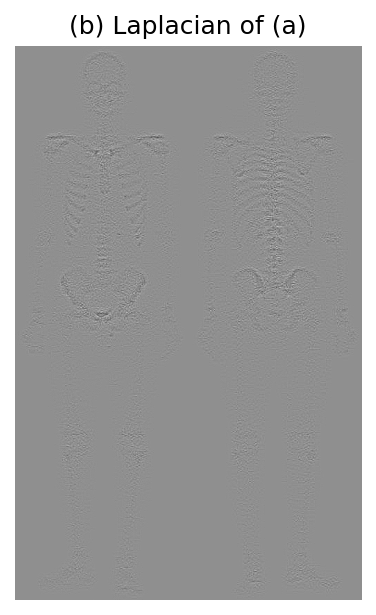

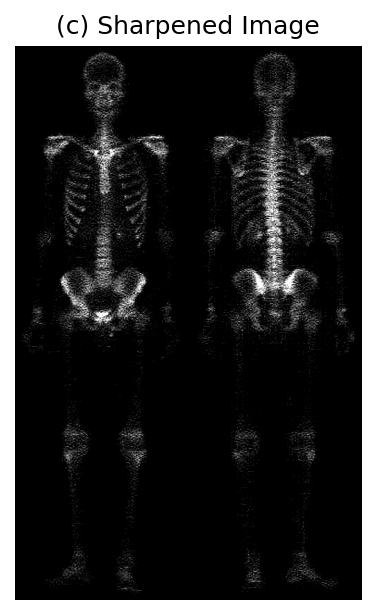

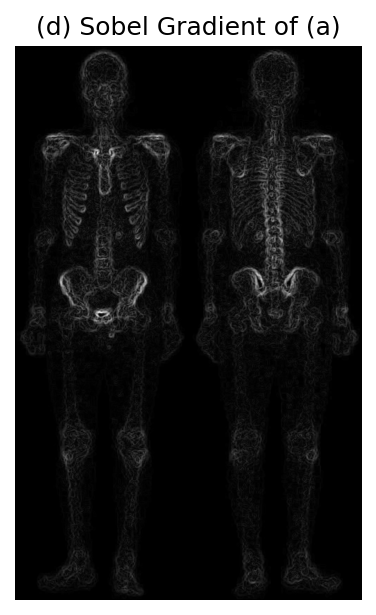

In [26]:
# open and normalized the image
f, width, height, maxval = mypgmread('Fig0343.pgm')
f = f / maxval  # normalize to [0, 1]

plt.figure(dpi=150)
plt.imshow(f, cmap='gray')
plt.axis('off')
plt.title('a) Original Image')
plt.show()

# transform into frequency domain

plt.figure(dpi=150)
plt.imshow(np.log1p(np.abs(centered_spectrum)), cmap='gray')
plt.axis('off')
plt.title('Frequency Domain')
plt.show()

# Laplacian Filter
P, Q = centered_spectrum.shape
H = np.zeros((P, Q), dtype=np.float32)
for u in range(P):
    for v in range(Q):
        H[u, v] = -4 * np.pi**2 * ((u - P/2)**2 + (v - Q/2)**2)
plt.figure(dpi=150)
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.title('Laplacian Filter')
plt.show()

# Laplacian image
Lap = H * centered_spectrum
Lap = np.fft.ifftshift(Lap)
Lap = np.real(np.fft.ifft2(Lap))


laplacian_min = np.min(Lap)
laplacian_max = np.max(Lap)

scaled_min = -1
scaled_max = 1

Laplace = (((Lap - laplacian_min) * (scaled_max - scaled_min)) / (laplacian_max - laplacian_min)) + scaled_min
 
plt.figure(dpi=150)
plt.imshow(Laplace, cmap='gray')
plt.axis('off')
plt.title('(b) Laplacian of (a)')
plt.show()

# image enhancement
c = -1
g = f + c * Laplace
g = np.clip(g, 0, 0.8)

plt.figure(dpi=150)
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.title('(c) Sharpened Image')
plt.show()

def sobel_gradient(imgval, width, height):
    mask_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    mask_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    size = 3
    pnum = 3 // 2

    padding = np.pad(imgval, pnum, mode='constant')  # padding yapılır
    gradient_x = np.zeros([height, width])
    gradient_y = np.zeros([height, width])

    for i in range(0, height - 1):
        for j in range(0, width - 1):
            data = padding[i:i + size, j:j + size]
            gradient_x[i][j] = int(np.sum((padding[i:i + size, j:j + size]) * mask_x))
            gradient_y[i][j] = int(np.sum((padding[i:i + size, j:j + size]) * mask_y))

    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    return gradient_magnitude
f, width, height, maxval = mypgmread('Fig0343.pgm')
sobel_gradient_result = sobel_gradient(f, width, height)
plt.figure(dpi=150)
plt.imshow(sobel_gradient_result, cmap='gray')
plt.axis('off')
plt.title('(d) Sobel Gradient of (a)')
plt.show()



In [27]:
def averagingfilter(imgval,width,height,maxval,filtersize):
    mask = np.ones([filtersize,filtersize], dtype = int)  #maske oluşturulur
    mask = mask/pow(filtersize,2)
    size = filtersize
    pnum = filtersize//2
    
    padding=np.pad(imgval,pnum,mode='constant')   #padding yapılır
    img_new=np.zeros([height,width])
    
    for i in range(0, height-1):
        for j in range(0, width-1):
            data = padding[i:i+size, j:j+size]  #average filter 
            datamean = np.mean(data)
            img_new[i,j] = datamean
    img_new= img_new.astype(np.uint8)
    return img_new


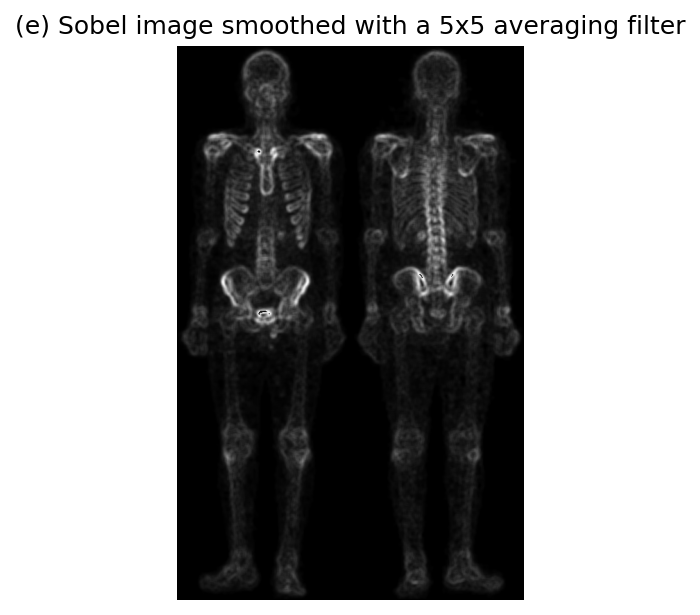

In [28]:
filter5x5 = averagingfilter(sobel_gradient_result, width, height, maxval,5)
plt.figure(dpi=150)
plt.imshow(filter5x5, cmap='gray')
plt.title('(e) Sobel image smoothed with a 5x5 averaging filter')
plt.axis('off')  # Eksenleri kapatıldı
plt.show()


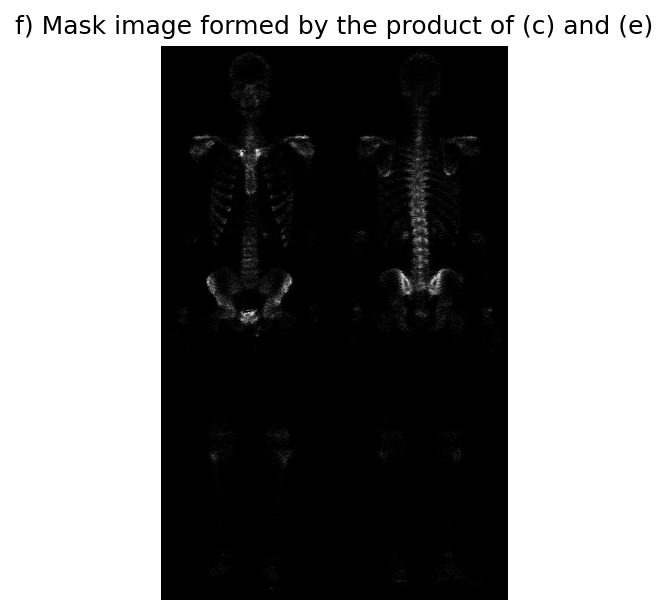

In [29]:
product = g * filter5x5
plt.figure(dpi=150)
plt.imshow(product, cmap='gray')
plt.title('f) Mask image formed by the product of (c) and (e)')
plt.axis('off')  # Eksenleri kapatıldı
plt.show()

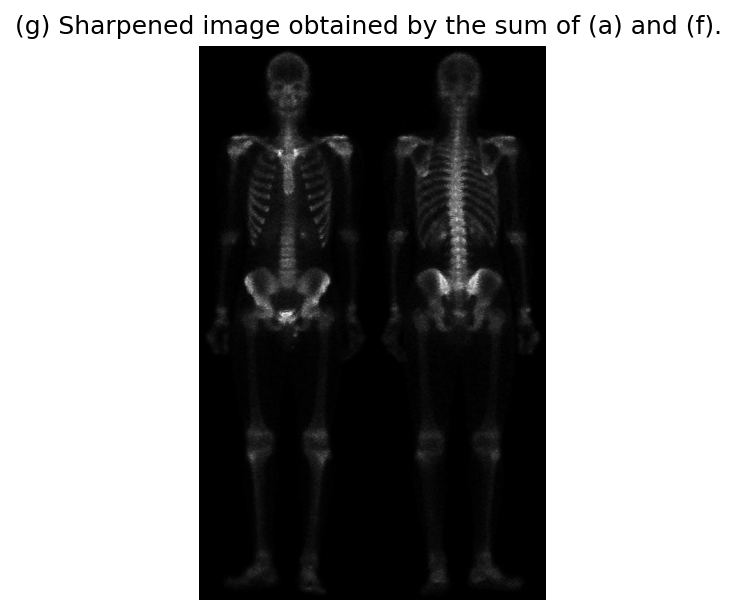

In [30]:
f, width, height, maxval = mypgmread('Fig0343.pgm')
sumof = f + product
plt.figure(dpi=150)
plt.imshow(sumof, cmap='gray')
plt.title('(g) Sharpened image obtained by the sum of (a) and (f). ')
plt.axis('off')  # Eksenleri kapatıldı
plt.show()

In [31]:
def gammatransform(imgval,gamma,c):
    gamma_imgval= c*pow(imgval,gamma) #s = cr^g
    return gamma_imgval


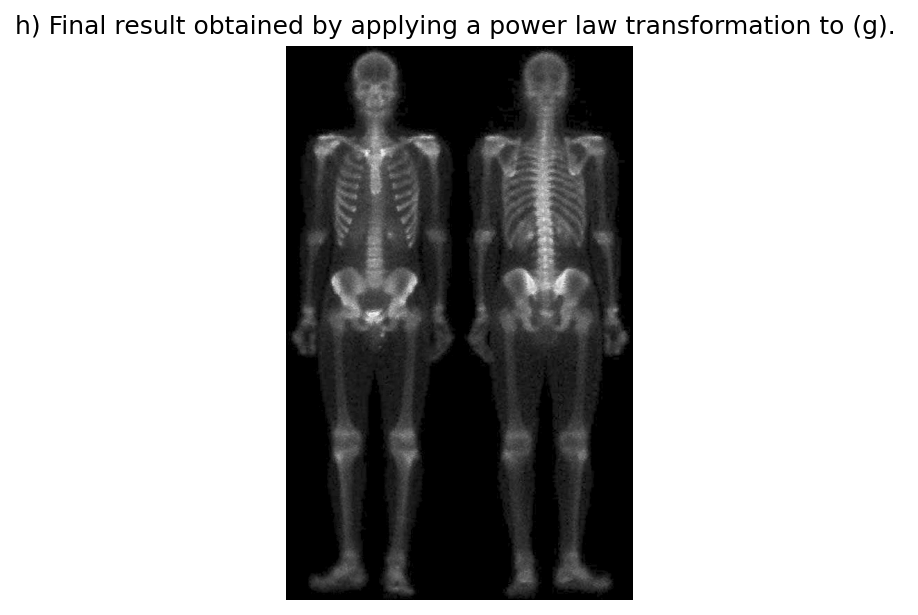

In [32]:
gamma_05 = gammatransform(sumof, 0.5,1)
plt.figure(dpi=150)
plt.imshow(gamma_05, cmap='gray')
plt.title('h) Final result obtained by applying a power law transformation to (g). ')
plt.axis('off')  # Eksenleri kapatıldı
plt.show()

### Saat Kulesi

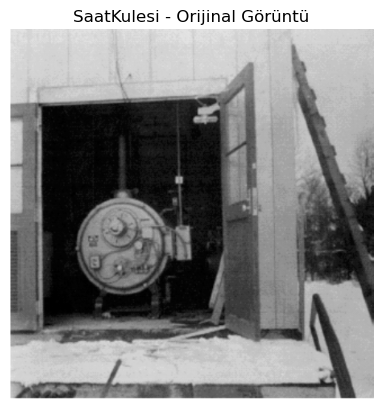

In [33]:
SaatKulesi, width, height, maxval = mypgmread('SaatKulesi.pgm')
plt.imshow(SaatKulesi, cmap='gray')
plt.title('SaatKulesi - Orijinal Görüntü')
plt.axis('off')
plt.show()

In [34]:
import numpy as np
import matplotlib.pyplot as plt


def my_homomorphic_filter(input_image, low_gamma_param, high_gamma_param, filter_coeff_param, cutoff_frequency_param):
    log_result = np.log1p(np.array(input_image, dtype="float"))
    fft_result = my_2d_fft(log_result)

    rows, cols = input_image.shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.ones((rows, cols))
    
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            mask[i, j] = (high_gamma_param - low_gamma_param) * (1 - np.exp(-filter_coeff_param * (distance*2) / (cutoff_frequency_param*2))) + low_gamma_param

    fft_result_filtered = fft_result * mask
    homomorphic_result = np.abs(np.fft.ifft2(fft_result_filtered))
    homomorphic_result = np.expm1(homomorphic_result)

    return homomorphic_result



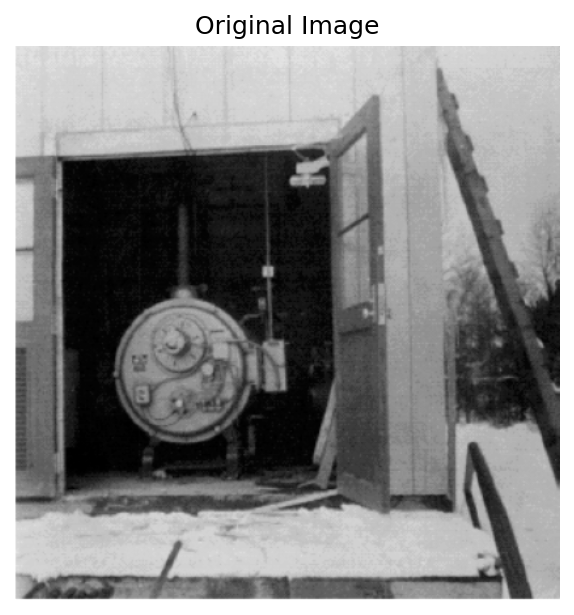

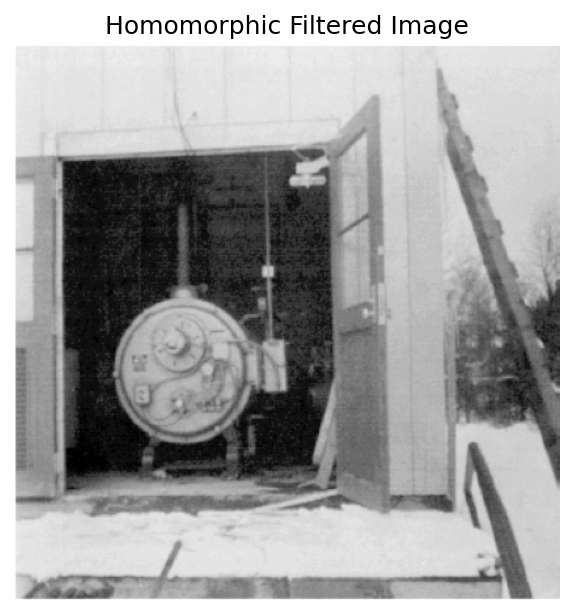

In [35]:
low_gamma_value = 0.5
high_gamma_value = 2.0
filter_coefficient_value = 0.1
cutoff_frequency_value = np.sqrt((u - width/2)**2 + (v - height/2)**2)

homomorphic_result = my_homomorphic_filter(SaatKulesi, low_gamma_value, high_gamma_value, filter_coefficient_value, cutoff_frequency_value)

plt.figure(dpi=150)
plt.imshow(SaatKulesi, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

plt.figure(dpi=150)
plt.imshow(homomorphic_result, cmap='gray')
plt.title("Homomorphic Filtered Image")
plt.axis('off')
plt.show()

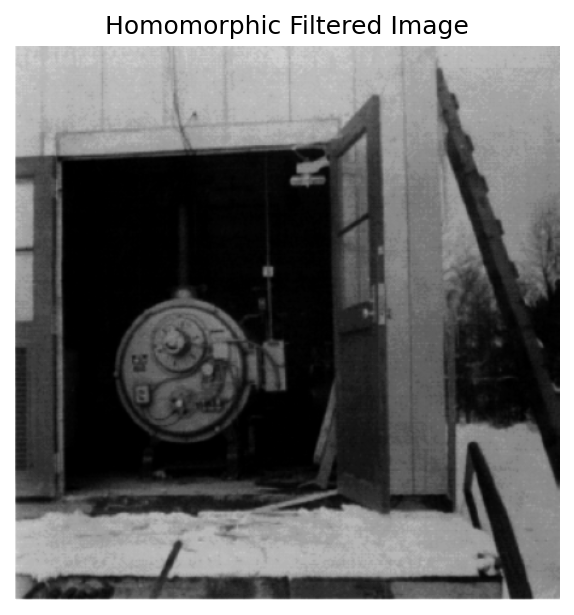

In [36]:
low_gamma_value = 0.8
high_gamma_value = 20
filter_coefficient_value = 0.1
cutoff_frequency_value = np.sqrt((u - width/2)**2 + (v - height/2)**2)

homomorphic_result = my_homomorphic_filter(SaatKulesi, low_gamma_value, high_gamma_value, filter_coefficient_value, cutoff_frequency_value)

plt.figure(dpi=150)
plt.imshow(homomorphic_result, cmap='gray')
plt.title("Homomorphic Filtered Image")
plt.axis('off')
plt.show()

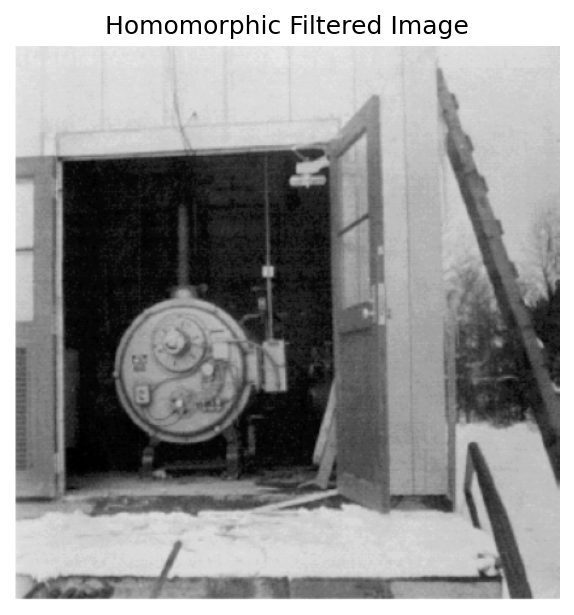

In [37]:
low_gamma_value = 0.8
high_gamma_value = 1
filter_coefficient_value = 0.1
cutoff_frequency_value = np.sqrt((u - width/2)**2 + (v - height/2)**2)

homomorphic_result = my_homomorphic_filter(SaatKulesi, low_gamma_value, high_gamma_value, filter_coefficient_value, cutoff_frequency_value)

plt.figure(dpi=150)
plt.imshow(homomorphic_result, cmap='gray')
plt.title("Homomorphic Filtered Image")
plt.axis('off')
plt.show()

###  low_gamma_value her iki resimde de 0.8 olduğunda high_gamma_value'nun yüksek değer olduğunda görüntnün daha karanlık olduğu görülmüştür.

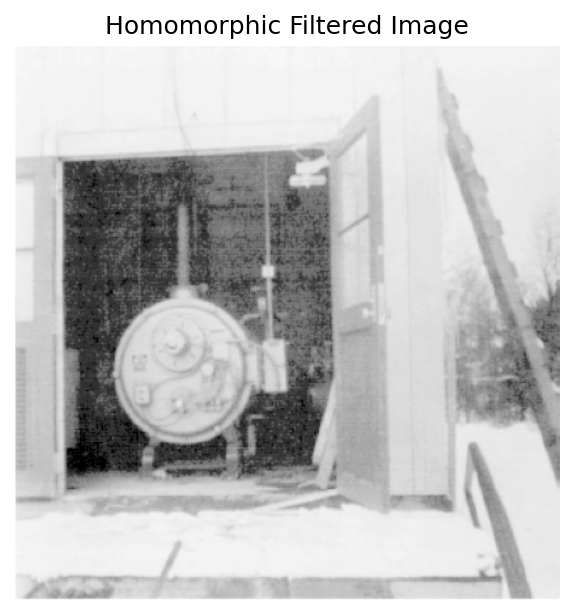

In [38]:
low_gamma_value = 0.05
high_gamma_value = 2
filter_coefficient_value = 0.1
cutoff_frequency_value = np.sqrt((u - width/2)**2 + (v - height/2)**2)

homomorphic_result = my_homomorphic_filter(SaatKulesi, low_gamma_value, high_gamma_value, filter_coefficient_value, cutoff_frequency_value)

plt.figure(dpi=150)
plt.imshow(homomorphic_result, cmap='gray')
plt.title("Homomorphic Filtered Image")
plt.axis('off')
plt.show()

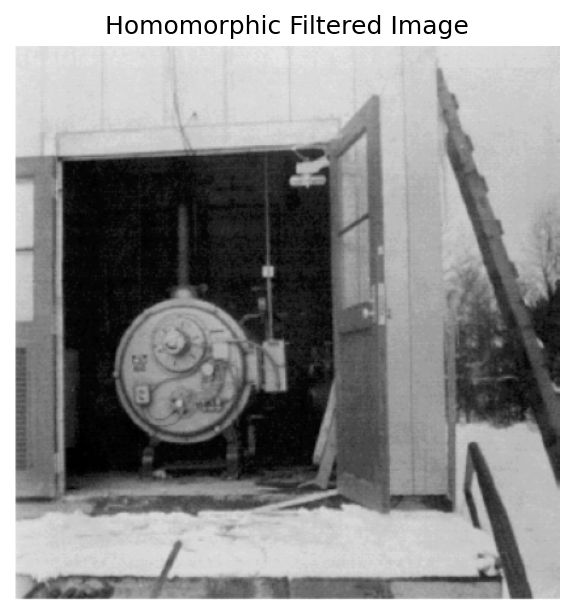

In [39]:
low_gamma_value = 0.8
high_gamma_value = 2
filter_coefficient_value = 0.1
cutoff_frequency_value = np.sqrt((u - width/2)**2 + (v - height/2)**2)

homomorphic_result = my_homomorphic_filter(SaatKulesi, low_gamma_value, high_gamma_value, filter_coefficient_value, cutoff_frequency_value)

plt.figure(dpi=150)
plt.imshow(homomorphic_result, cmap='gray')
plt.title("Homomorphic Filtered Image")
plt.axis('off')
plt.show()

###  high_gamma_value her iki resimde de 2 olduğunda low _gamma_value'nun yüksek değer olduğunda görüntnün daha karanlık olduğu görülmüştür.